**Exploratory Data Analysis**

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [8]:
#imports

import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [9]:
# create the dataframe
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)

#let's also check the index are in order
df = df.reset_index(drop=True)

In [10]:
df.head()

,reviews,stars,date,country,verified,corpus
0,✅ Trip Verified | I have never travelled wit...,5.0,2025-02-14,United Kingdom,True,never travelled british airway first time chos...
1,"✅ Trip Verified | Terrible overall, medium ser...",9.0,2025-02-07,Switzerland,True,ble overall medium service flight delayed help...
2,✅ Trip Verified | London Heathrow to Male In...,1.0,2025-02-01,United Kingdom,True,london heathrow male new business class ba con...
3,Not Verified | Very good flight following an ...,9.0,2025-01-20,United Kingdom,False,verified good flight following equally good fl...
4,Not Verified | An hour's delay due to late ar...,9.0,2025-01-19,United Kingdom,False,verified hour delay due late arrival incoming ...


What is the average overall rating given for British Airways?

In [11]:
df.stars.mean()

np.float64(4.525728987993139)

What is the total counts for each ratings?

Text(0.5, 0.98, 'Counts for each ratings')

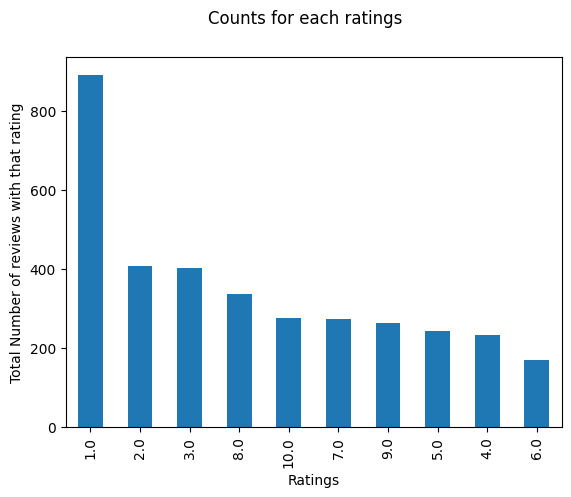

In [12]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [13]:
# Count the occurrences of each unique value in the 'stars' column
# and convert the result into a DataFrame
df_ratings = df['stars'].value_counts().reset_index()

# Rename columns for better readability
df_ratings.columns = ['stars', 'total_counts']

# Calculate the percentage of each rating category
pct_values = (df_ratings['total_counts'] / df_ratings['total_counts'].sum() * 100).tolist()

# Round percentages to two decimal places
pct_values = [round(x, 2) for x in pct_values]

# Add the percentage values as a new column in df_ratings
df_ratings['pct_values'] = pct_values

# Print the final DataFrame to verify the output
print(df_ratings)

   stars  total_counts  pct_values
0    1.0           892       25.50
1    2.0           407       11.64
2    3.0           402       11.49
3    8.0           337        9.63
4   10.0           277        7.92
5    7.0           273        7.80
6    9.0           264        7.55
7    5.0           244        6.98
8    4.0           233        6.66
9    6.0           169        4.83


C:\Users\shaik\AppData\Local\Temp\ipykernel_3668\1031120606.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
C:\Users\shaik\AppData\Local\Temp\ipykernel_3668\1031120606.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,


Text(0.5, 1.0, 'Counts for each ratings')

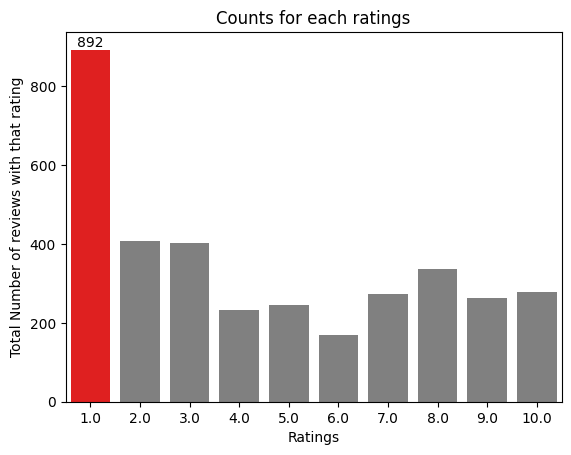

In [14]:
clrs = ['Red' if (x ==  max(df_ratings.total_counts)) else 'grey' for x in df_ratings.total_counts ]
ax = sns.barplot(x=df_ratings.stars, y=df_ratings.total_counts, data=df_ratings, errwidth=0,
                palette=clrs)


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each ratings")

In [15]:
# Unique countries BA recieved the reviews from

print(f"{len(df.country.unique())} unique countries")

71 unique countries


Which country most review comes from?

In [16]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

print(df_country_review.columns)

Index(['country', 'count'], dtype='object')


<Axes: xlabel='country'>

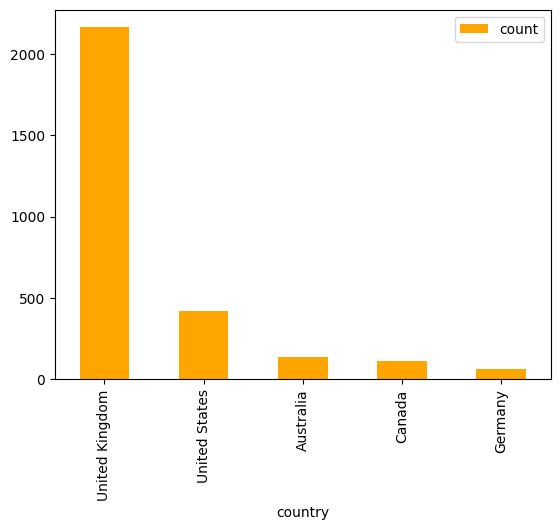

In [17]:
df_country_review.plot(kind="bar", x='country', color='orange')

Which country provided on average highest ratings?

In [18]:
#df_country_rating = pd.DataFrame(df.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()

df_country_rating = df.groupby('country', as_index=False)['stars'].mean()
df_country_rating = df_country_rating.sort_values(by='stars', ascending=False).reset_index(drop=True)



In [19]:
df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

In [20]:
print(df_country_rating)

       country  avg_rating
0      Morocco        10.0
1   Costa Rica         9.0
2      Ecuador         9.0
3        Chile         9.0
4       Panama         8.0
..         ...         ...
66  Luxembourg         2.5
67     Bermuda         1.5
68      Jordan         1.0
69     Senegal         1.0
70     Vietnam         1.0

[71 rows x 2 columns]


Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

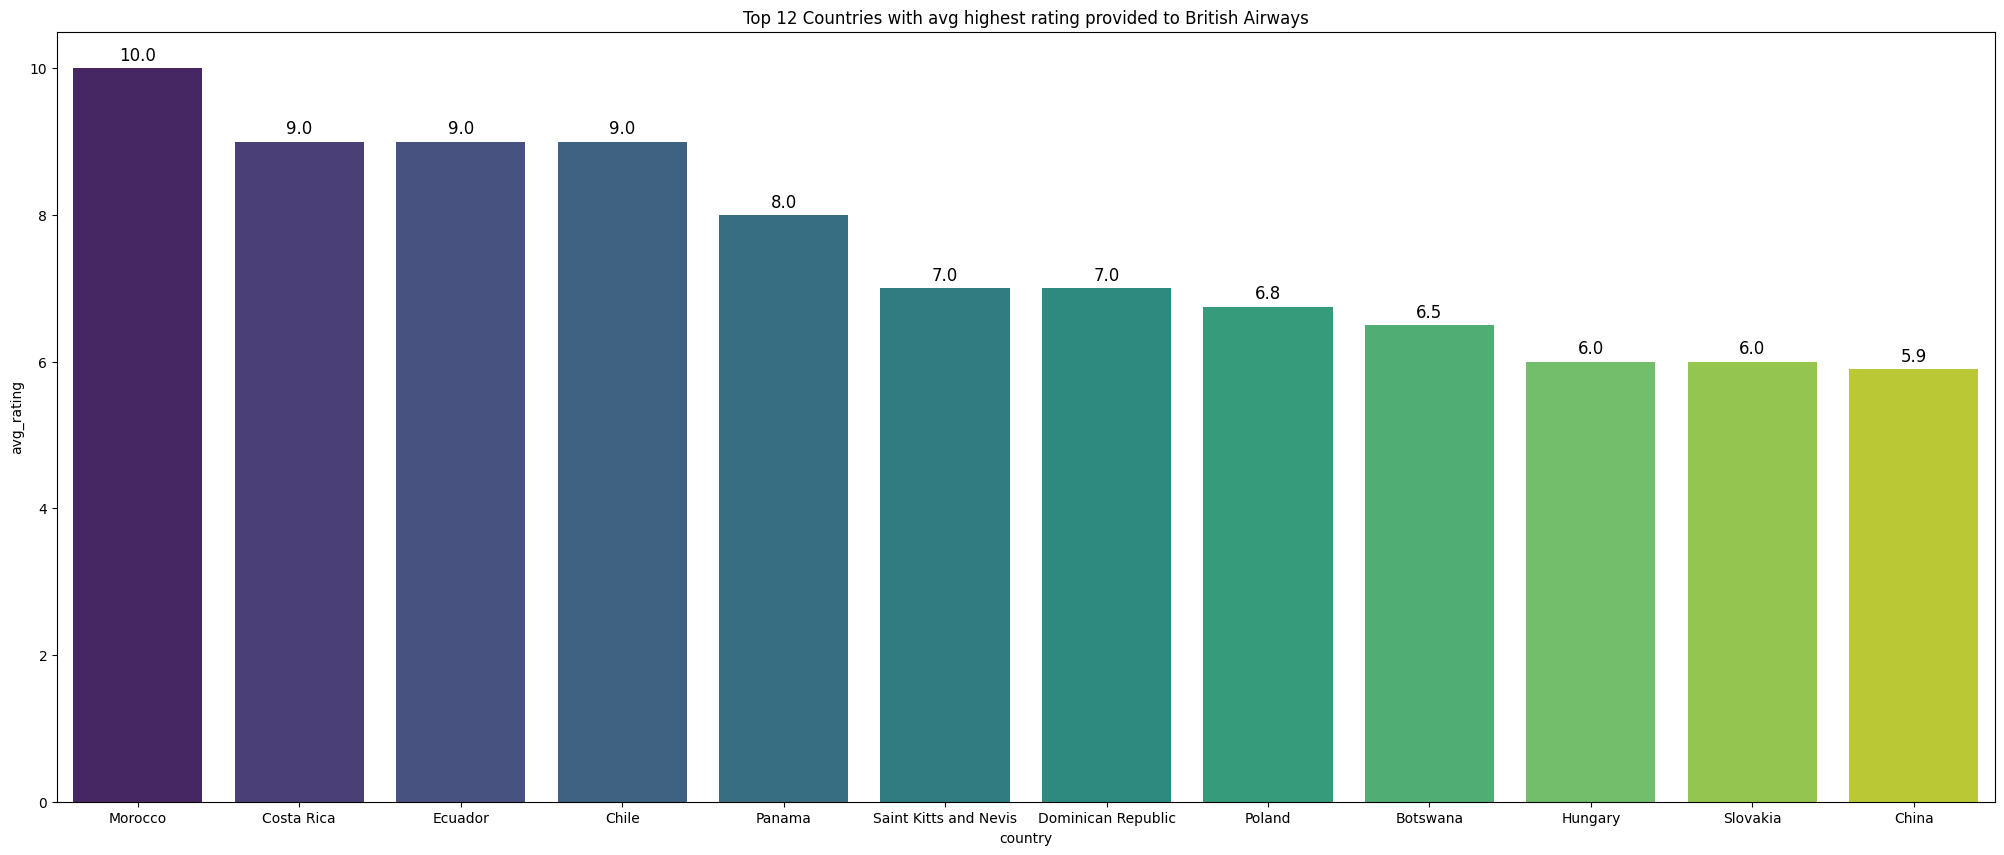

In [21]:
fig, ax = plt.subplots(figsize=(25,10))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12], hue='country', palette="viridis", legend=False)

for container in ax1.containers:
    ax1.bar_label(container, fmt='%.1f', label_type='edge', fontsize=12, padding=3)

ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

*TIME SERIES ANALYSIS*

In [22]:
#convert the date datatype to datetime

df.date = pd.to_datetime(df.date)

In [23]:
pip install --upgrade nbformat

Note: you may need to restart the kernel to use updated packages.


In [35]:
import plotly.express as px

fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

It can be seen that between April 2020 to August 2021 there has been a decline in reviews due to Covid Pandemic travel restrictions. Not much can be inferred at this point as the dates we have are the when the customers posted their reviews which does not take into account the actual flight date. Hence no particular significan trend is visible from the plot.

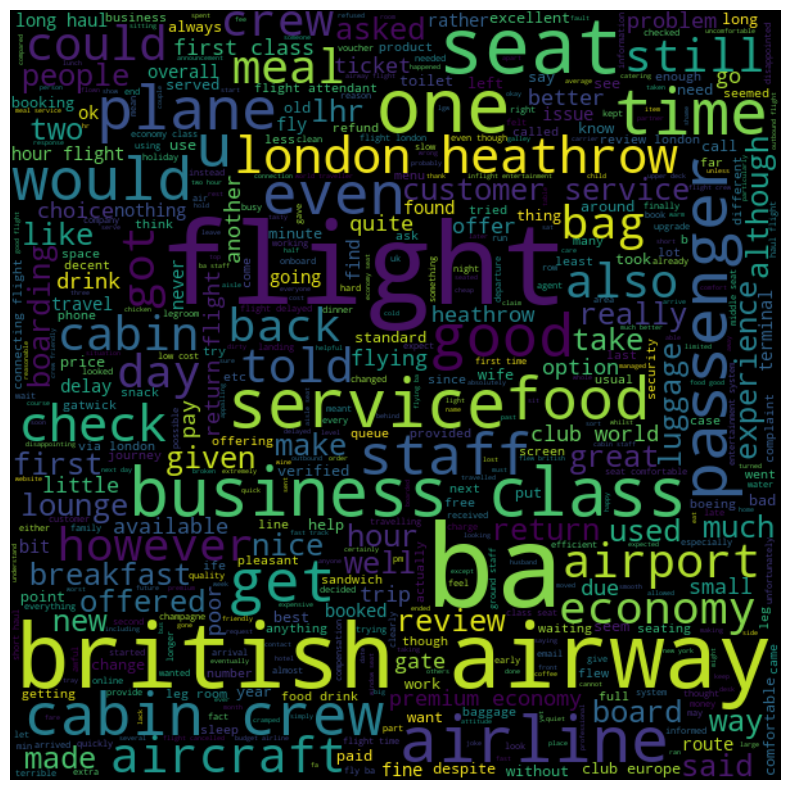

In [40]:
import nltk
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=90, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are many words that do not indicate whether a review is positive or negative. For example, words like "passenger" and "flight" do not provide conclusive sentiment value. Therefore, we can include them in the stopwords list.

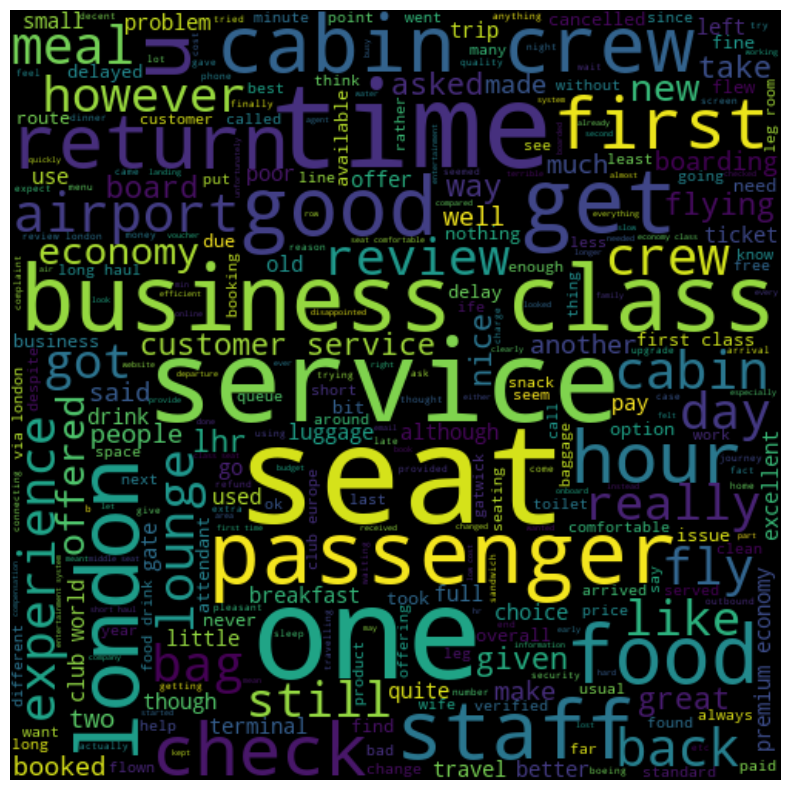

In [41]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=90, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

**Word Frequency**

In [49]:
pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 2.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/11.1 MB 2.5 MB/s eta 0:00:04
   ----- ---------------------------------- 1.6/11.1 MB 2.2 MB/s eta 0:00:05
   ------- -------------------------------- 2.1/11.1 MB 2.3 MB/s eta 0:00:05
   -------- ------------------------------- 2.4/11.1 MB 2.2 MB/s eta 0:00:04
   --------- ------------------------------ 2.6/11.1 MB 2.0 MB/s eta 0:00:05
   --------- ------------------------------ 2.6/11.1 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 2.9/11.1 MB 1.6 MB/s eta 0:00:06
   ---------- ----------------------------- 2.9/11.1 MB 1.6 MB/s eta 0:00:06
   ---------- -------------

In [50]:
import sklearn
print(sklearn.__version__)  # To verify installation

1.6.1


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

Text(0.5, 1.0, 'Word Frequency')

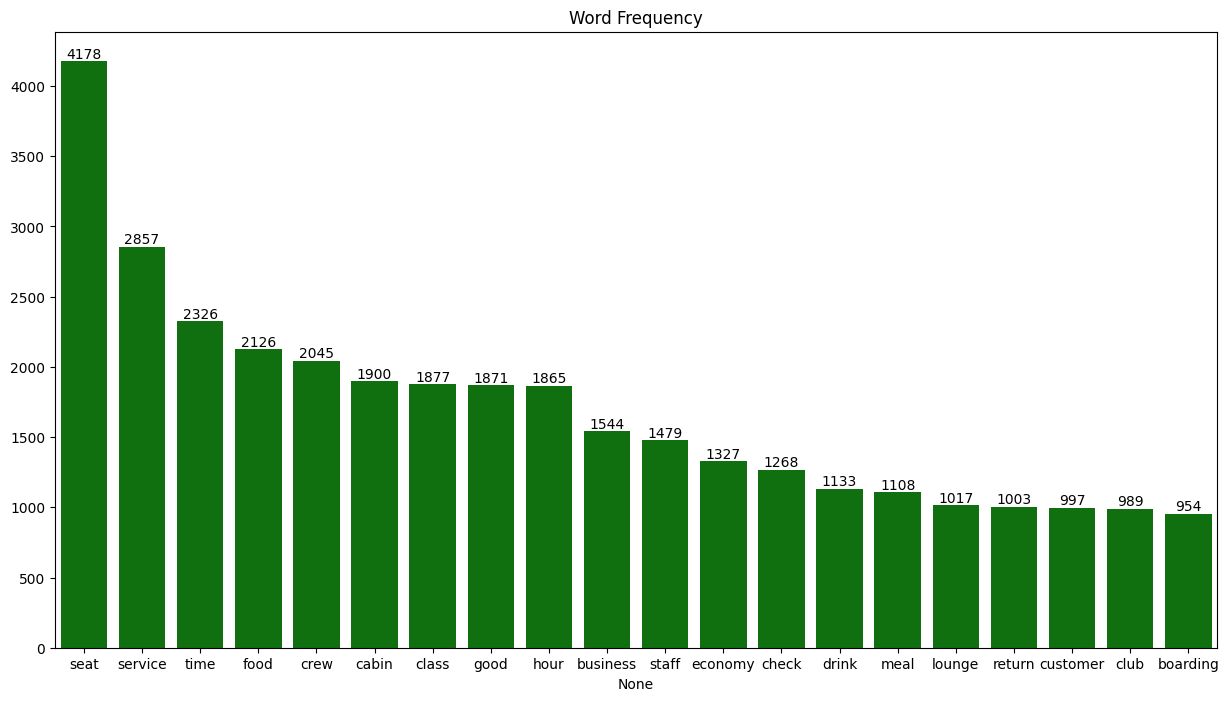

In [ ]:
## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(15,8))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax, palette='vibgyor')  
all_plot.bar_label(all_plot.containers[0])

ax.set_title("Word Frequency")

This allows us to get a sense of what the customers are actually discussing. As we can see, in terms of customer service, "seat" is the most frequently mentioned aspect of the airline, followed by "service" and "food." We are still unsure of how they are expressing themselves regarding each of these services, though. To give these concepts any meaning, we will use ngram plots to determine whether they are beneficial or poor in experience.

